# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

#### 2. What are the predictors/covariates? 

Answer: Any of the originally collected demographic data (age, gender, location, & profession) and customer usage data (days since last log in, & activity score)

#### 3. What timeframe is this data relevent for?

Answer: January through April of 2015

#### 4. What is the hypothesis?

Answer: No specific hypothesis is implied, but my specific hypothesis would be:  From the period of Jan-April 2015, when looking at converted paying customers when compared to free-tier customers, there will be specific professions that correlate to higher overall conversion rates relative to other professions.  This cutoff between what is considered a high conversion rate and not will be measured via the strength of correlation between each profession listed and the converted status.

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
Var 1 | 0 = not thing 1 = thing | categorical
Var 2 | thing in unit X | continuous 


We would like to explore the association between X and Y 

In [19]:
# Testing a different way to read in the data using relative path method

#import pandas as pd
#import os 
#print(os.getcwd())
#data = pd.read_csv(os.path.join('..','assets','admissions.csv')) #the '..' is relative to where you are

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000
prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


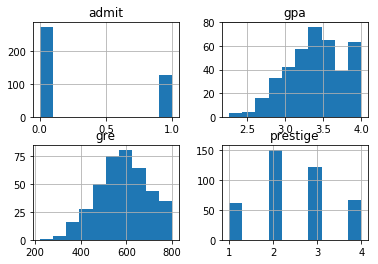

In [67]:
import pandas as pd
import numpy as np
import os
import pylab as pl

# Reading in the data
data = pd.read_csv('/Users/mundyreimer/documents/DAT-SM-18/projects/project-1/assets/admissions.csv')


# Testing if the above works with the first 5 entries/rows
print(data.head(5))


# Summarizing the data
print(data.describe())


# Initializing & filling in the data dictionary: 

# First Method:
#candidates = dict(data)

# Second Method: ???
#candidates = {'admit':[], 'gre':[], 'gpa':[], 'prestige':[]}
#print(candidates)

# Third Method: 
# I don't understand why the following doesn't work, 
# since this is the one more intuitive to me...
#candidates = {}
#for row in data:
#    k,v = row
#    candidates[k] = v


# Starting Exploratory Data Analysis Phase
# Plotting Frequency Tables
print(pd.crosstab(data['admit'], data['prestige'], rownames=['admit']))
data.hist()
pl.show()

#### 2. What is the outcome?

Answer: The binary outcome admit (admitted=1, not admitted=0) of whether or not candidate was admitted to grad school.

#### 3. What are the predictors/covariates? 

Answer: The GRE, GPA, & the Prestige rank of the candidate's undergraduate school

#### 4. What timeframe is this data relevent for?

Answer: It doesn't specify (nor does the accompanying yhat link), but I am assuming it is from one application cycle.

#### 4. What is the hypothesis?

Answer: A combination of GRE, GPA, & the Prestige/rank of the candidate's undergraduate school will allow us to predict whether or not they will be admitted to grad school

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To summarize the data in order to later formulate hypotheses that could lead to experiments or formal data analysis via modeling.

#### 2a. What are the assumptions of the distribution of data? 

Answer:  I would assume that the data are normally distributed.

#### 2b. How will determine the distribution of your data? 

Answer: I would plot a histogram (discrete) or density (continuous) of each predictor variable of the data.

#### 3a. How might outliers impact your analysis? 

Answer: If I were using the mean as a measure, outliers would bias it as opposed to the median.  Outliers might also skew my plotted data distribution.

#### 3b. How will you test for outliers? 

Answer: I can use a 1.5X rule, where if a predictor variable is 1.5x the Interquartile Range (IQR), either above or below, I would call it an outlier.

#### 4a. What is colinearity? 

Answer: Colinearity occurs when one of my predictor variables is able to "explain" or be linearly predicted from the other predictor variables.  When one of these variables is perfectly colinear, then it is composed of some linear combination of the other variables (and thus the predictor space can possible be "compressed" down into a lower vector space)

#### 4b. How will you test for colinearity? 

Answer: You can plot the correlation among each of the predictor/explanatory variables.  If there is strong correlation amongst some subset of them, then there is some possible indication of colinearity.

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 
1) Collect the data and read it into an IPython Notebook (for reproducibility & traceability) as a data frame/data dictionary
2) Run a quick summary of the data to get features such as mean, median, mode, IQR, etc.  Be sure to identify possible outliers using the 1.5xIQR heuristic.
3) Plot each of the predictor variables' distribution to begin to identify the shapes of the data sets
4) Identify possible colinear predictor variables.  This would allow you to possibly set a reference variable or cut down the size of your data set.  It might also allow you to frame possible alternative hypotheses.
5) Formulate a hypothesis: For instance, I hypothesize that there would be a stronger correlation between GRE & GPA scores to whether or not the candidate was admitted, when compared to the hypothesized weaker correlation between rank of school and whether or not the candidate was admitted.
6) Test the hypothesis.  If the hypothesis turns out to be wrong, report that anyways so you are not contributing to the publication bias (only reporting positive results).  

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

In [66]:
'''2) Another hypothesis could be that there are no strong correlations between any 
of the predictor variables and the measured "admit" variable.
3) Given that many of these predictor variables could be colinear due underlying common 
causes that are not in this data set, these variables could show an "all-or-none" effect
where there is a strong bimodal distribution to the data set.  This colinearity might
also strengthen hypotheses (due to the assumption that all of these variables are contributing
an effect), when in fact they might be all be explaining the same hidden variable'''

'2) Another hypothesis could be that there are no strong correlations between any \nof the predictor variables and the measured "admit" variable.\n3) Given that many of these predictor variables could be colinear due underlying common \ncauses that are not in this data set, these variables could show an "all-or-none" effect\nwhere there is a strong bimodal distribution to the data set.  This colinearity might\nalso strengthen hypotheses (due to the assumption that all of these variables are contributing\nan effect), when in fact they might be all be explaining the same hidden variable'